In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

import warnings

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

DATA_DIR = 'data'

In [47]:
transactions = pd.read_csv(f'../{DATA_DIR}/transactions.csv')
transactions.head()

,Transaction_ID,User_ID,Crypto,Transaction_Type,Amount,Price_Per_Unit,Total_Value,Transaction_Fee,Platform,Status,Wallet_Type,Transaction_Date
0,434465,31394,Bitcoin,Withdraw,57.695145,45248.78,2610634.92,114990.70,KuCoin,Completed,Trezor,2024-04-10 09:51:58.222424
1,905397,39627,Solana,Stake,27.708982,48307.43,1338549.71,34560.11,Binance,Failed,Cold Wallet,2023-10-04 09:51:58.222424
2,451293,11506,Cardano,Buy,80.368977,44428.82,3570698.81,38312.76,OKX,Pending,Hot Wallet,2024-11-15 09:51:58.222424
3,841249,84005,XRP,Stake,83.900483,8755.31,734574.74,1396.89,FTX,Completed,Exchange Wallet,2024-02-11 09:51:58.222424
4,762686,66706,Dogecoin,Stake,52.528368,58667.26,3081695.42,19087.58,Kraken,Pending,Exchange Wallet,2023-09-15 09:51:58.222424


In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    10000 non-null  int64  
 1   User_ID           10000 non-null  int64  
 2   Crypto            10000 non-null  object 
 3   Transaction_Type  10000 non-null  object 
 4   Amount            10000 non-null  float64
 5   Price_Per_Unit    10000 non-null  float64
 6   Total_Value       10000 non-null  float64
 7   Transaction_Fee   10000 non-null  float64
 8   Platform          10000 non-null  object 
 9   Status            10000 non-null  object 
 10  Wallet_Type       10000 non-null  object 
 11  Transaction_Date  10000 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 937.6+ KB


In [7]:
transactions.describe()

,Transaction_ID,User_ID,Amount,Price_Per_Unit,Total_Value,Transaction_Fee
count,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,547132.392100,55176.38050,50.120755,29888.220522,1.506658e+06,37555.080850
std,262163.276431,25823.90504,28.902577,17215.202926,1.327017e+06,43871.976036
min,100027.000000,10016.00000,0.024363,10.270000,3.665000e+01,0.040000
25%,318120.750000,32775.00000,24.889845,15240.167500,4.124107e+05,6007.977500
50%,547635.000000,55643.00000,49.887958,29823.745000,1.124990e+06,21182.080000
75%,775336.000000,77450.00000,75.319944,44728.790000,2.310646e+06,53563.732500
max,999919.000000,99986.00000,99.997361,59995.760000,5.881193e+06,287527.830000


In [9]:
transactions['Crypto'].unique()

array(['Bitcoin', 'Solana', 'Cardano', 'XRP', 'Dogecoin', 'BNB',
       'Polkadot', 'Litecoin', 'Avalanche', 'Ethereum'], dtype=object)

In [10]:
transactions['Transaction_Type'].unique()

array(['Withdraw', 'Stake', 'Buy', 'Sell', 'Transfer'], dtype=object)

In [11]:
transactions['Platform'].unique()

array(['KuCoin', 'Binance', 'OKX', 'FTX', 'Kraken', 'Coinbase', 'Huobi'],
      dtype=object)

In [12]:
transactions['Status'].unique()

array(['Completed', 'Failed', 'Pending'], dtype=object)

In [13]:
transactions['Wallet_Type'].unique()

array(['Trezor', 'Cold Wallet', 'Hot Wallet', 'Exchange Wallet', 'Ledger'],
      dtype=object)

In [52]:
transactions['Status'].unique()

array(['Completed', 'Failed', 'Pending'], dtype=object)

In [15]:
transactions['Transaction_Date'] = pd.to_datetime(transactions['Transaction_Date']).dt.date
transactions

,Transaction_ID,User_ID,Crypto,Transaction_Type,Amount,Price_Per_Unit,Total_Value,Transaction_Fee,Platform,Status,Wallet_Type,Transaction_Date
0,434465,31394,Bitcoin,Withdraw,57.695145,45248.78,2610634.92,114990.70,KuCoin,Completed,Trezor,2024-04-10
1,905397,39627,Solana,Stake,27.708982,48307.43,1338549.71,34560.11,Binance,Failed,Cold Wallet,2023-10-04
2,451293,11506,Cardano,Buy,80.368977,44428.82,3570698.81,38312.76,OKX,Pending,Hot Wallet,2024-11-15
3,841249,84005,XRP,Stake,83.900483,8755.31,734574.74,1396.89,FTX,Completed,Exchange Wallet,2024-02-11
4,762686,66706,Dogecoin,Stake,52.528368,58667.26,3081695.42,19087.58,Kraken,Pending,Exchange Wallet,2023-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,186998,93233,Bitcoin,Stake,30.918047,20067.21,620438.94,5603.47,FTX,Pending,Trezor,2023-02-28
9996,337144,44181,Cardano,Buy,80.090849,42488.69,3402955.25,71081.12,Kraken,Failed,Ledger,2024-08-28
9997,946655,22496,BNB,Withdraw,19.005921,36513.00,693963.19,29738.11,Coinbase,Completed,Ledger,2023-04-06
9998,153921,72835,Litecoin,Buy,11.872668,19748.07,234462.28,10107.57,OKX,Failed,Trezor,2023-11-01


In [24]:
transactions.groupby("Crypto")["Price_Per_Unit"].describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
Crypto,,,,,,,,
Bitcoin,991.0,30743.910222,16827.564266,37.82,16874.6050,31593.770,45036.7250,59939.11
Cardano,997.0,30185.528064,17007.578928,10.27,15748.1500,30589.720,44069.7800,59809.24
Dogecoin,997.0,29996.406921,17533.445267,30.56,14655.2600,29853.660,44681.4300,59947.98
BNB,973.0,29981.330514,16977.966325,29.45,15460.9200,29901.180,44488.8700,59995.76
Polkadot,1077.0,29980.605255,17331.071115,26.49,15285.2800,29767.950,44651.2600,59984.31
Avalanche,1009.0,29762.036442,17322.128859,42.12,15241.4400,29145.890,44793.0400,59938.88
Solana,1000.0,29756.053240,17325.648684,72.63,14863.6550,29581.665,44834.7550,59800.91
Ethereum,1042.0,29668.915509,17250.981480,37.40,15507.2525,29615.670,44158.3025,59822.64
Litecoin,950.0,29554.600116,17591.299034,23.54,13308.0275,29407.985,45763.4725,59985.75


In [23]:
btc.sort_values(by='Transaction_Date').describe()

,Transaction_ID,User_ID,Amount,Price_Per_Unit,Total_Value,Transaction_Fee
count,991.000000,991.000000,991.000000,991.000000,9.910000e+02,991.000000
mean,536381.651867,54680.210898,51.441463,30743.910222,1.590879e+06,39029.441665
std,262664.946469,26050.730441,29.188524,16827.564266,1.338536e+06,44179.982083
min,100824.000000,10039.000000,0.117149,37.820000,3.665000e+01,1.490000
25%,305808.000000,32580.500000,25.242138,16874.605000,4.724644e+05,7187.390000
50%,528747.000000,54355.000000,51.913775,31593.770000,1.260768e+06,21705.130000
75%,756397.000000,77032.500000,77.826822,45036.725000,2.435794e+06,55207.010000
max,999298.000000,99983.000000,99.777156,59939.110000,5.701556e+06,253372.830000


In [40]:
import requests 
import time 

def download_csv(coin_id, currency):
    """
    This function downloads the data from Coingecko with the usd pair.
    Inputs:
        - coin_id: the name of the crypto we are getting the data
        - currency: by default it is the usd
    Output:
        - This function simply stores under raw_data directory a file
        from coingecko with all historic data available
    """
    # Construct the URL
    base_url = "https://www.coingecko.com"
    csv_path = f"/price_charts/export/{coin_id}/{currency}.csv"
    full_url = base_url + csv_path

    # Download the CSV
    response = requests.get(full_url,  headers = {'User-agent': 'Price Scrapper'})
    if response.status_code == 429:
        time.sleep(int(response.headers["Retry-After"]))
    elif response.status_code == 200:
        file_name = f"../data/prices/{coin_id}_historical_data.csv"
        with open(file_name, "wb") as file:
            file.write(response.content)

    else:
        print(f"Failed to download CSV for {coin_id}.")

crypto_list = transactions['Crypto'].unique() #Select which list are you pulling data for

crypto_list = [x.lower() for x in crypto_list]


for crypto in crypto_list:
    download_csv(coin_id=crypto, currency="usd")
    #download_tvl_csv(coin_id=crypto)


In [48]:
import pandas as pd
from datetime import datetime

# Load the transactions CSV file
transactions_df = transactions
# Make a copy of the original data to extract fee rates
original_df = transactions_df.copy()

# Calculate the original fee rate as percentage of total value
original_df['Fee_Rate'] = original_df['Transaction_Fee'] / original_df['Total_Value'] * 100

# Convert Transaction_Date to datetime and then extract the date component
transactions_df['Transaction_Date'] = pd.to_datetime(transactions_df['Transaction_Date'])
transactions_df['Transaction_Date_Only'] = transactions_df['Transaction_Date'].dt.date

# List of cryptocurrencies
cryptos = [
    'bitcoin', 'solana', 'cardano', 'xrp', 'ethereum', 
    'avalanche', 'polkadot', 'litecoin', 'dogecoin', 'bnb'
]

# Dictionary to store historical price data for each crypto
crypto_prices = {}

# Load historical data for each cryptocurrency
for crypto in cryptos:
    try:
        filename = f"../data/prices/{crypto}_historical_data.csv"
        crypto_df = pd.read_csv(filename)
        
        # Convert snapped_at to datetime and then extract the date component
        crypto_df['snapped_at'] = pd.to_datetime(crypto_df['snapped_at'])
        crypto_df['date_only'] = crypto_df['snapped_at'].dt.date
        
        # Store in dictionary with lowercase crypto name as key
        crypto_prices[crypto.lower()] = crypto_df
        print(f"Loaded historical data for {crypto}: {len(crypto_df)} entries")
    except Exception as e:
        print(f"Error loading data for {crypto}: {e}")

# Function to find the price for a given crypto on a specific date
def get_price_for_date(crypto_name, transaction_date):
    # Convert crypto name to lowercase for matching
    crypto_lower = crypto_name.lower()
    
    # Check if we have historical data for this crypto
    if crypto_lower not in crypto_prices:
        print(f"No historical data available for {crypto_name}")
        return None
    
    # Get the historical data dataframe
    hist_df = crypto_prices[crypto_lower]
    
    # Find the closest matching date
    matching_rows = hist_df[hist_df['date_only'] == transaction_date]
    
    if len(matching_rows) > 0:
        # If we have matching entries, get the price
        # Assuming there's a 'price' column - adjust if your column name is different
        price = matching_rows.iloc[0]['price']  # Change 'price' to your actual price column name
        return price
    else:
        print(f"No price data found for {crypto_name} on {transaction_date}")
        return None

# Update prices in the transactions dataframe
update_count = 0
error_count = 0

for index, row in transactions_df.iterrows():
    crypto = row['Crypto']
    trans_date = row['Transaction_Date_Only']
    
    # Get price for this crypto on this date
    price = get_price_for_date(crypto, trans_date)
    
    if price is not None:
        # Update price per unit
        transactions_df.at[index, 'Price_Per_Unit'] = price
        
        # Recalculate total value
        new_total_value = row['Amount'] * price
        transactions_df.at[index, 'Total_Value'] = new_total_value
        
        # Apply the original fee rate to calculate new fee
        original_fee_rate = original_df.at[index, 'Fee_Rate']
        transactions_df.at[index, 'Transaction_Fee'] = new_total_value * (original_fee_rate / 100)
        
        update_count += 1
    else:
        error_count += 1

# Drop the temporary date column
transactions_df = transactions_df.drop('Transaction_Date_Only', axis=1)

# Save the updated dataframe
transactions_df.to_csv('updated_crypto_transactions.csv', index=False)

print(f"Updated {update_count} of {len(transactions_df)} transactions")
print(f"Failed to update {error_count} transactions")
print("Updated CSV saved as 'updated_crypto_transactions.csv'")

Loaded historical data for bitcoin: 4356 entries
Loaded historical data for solana: 1818 entries
Loaded historical data for cardano: 2724 entries
Loaded historical data for xrp: 4255 entries
Loaded historical data for ethereum: 3526 entries
Loaded historical data for avalanche: 1654 entries
Loaded historical data for polkadot: 1688 entries
Loaded historical data for litecoin: 4356 entries
Loaded historical data for dogecoin: 4124 entries
Loaded historical data for bnb: 2754 entries
Updated 10000 of 10000 transactions
Failed to update 0 transactions
Updated CSV saved as 'updated_crypto_transactions.csv'


In [49]:
transactions_df.groupby("Crypto")["Price_Per_Unit"].describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
Crypto,,,,,,,,
Bitcoin,991.0,54161.482716,24967.769426,20195.228950,29314.097387,57049.118751,67978.610234,106182.236820
Ethereum,1042.0,2530.915676,718.173491,1429.603169,1854.508435,2422.093289,3173.629947,4070.604075
BNB,973.0,444.435491,174.434999,204.998916,267.178800,495.964297,596.658133,750.245494
Solana,1000.0,107.246947,72.924722,14.511891,23.267717,112.599112,166.044479,262.561576
Litecoin,950.0,81.652428,17.835233,56.016460,68.678939,75.015212,90.950497,136.858566
Avalanche,1009.0,25.848089,12.175269,8.819813,14.322345,25.376391,35.772729,60.391872
Polkadot,1077.0,6.003344,1.567657,3.655041,4.669574,5.775235,6.855796,11.463164
XRP,964.0,0.836614,0.709672,0.362040,0.506044,0.561322,0.626015,3.307161
Cardano,997.0,0.475603,0.216568,0.242557,0.336765,0.391884,0.580232,1.233002


In [50]:
transactions_df.groupby("Crypto")["Transaction_Fee"].describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
Crypto,,,,,,,,
Bitcoin,991.0,68904.719361,72735.045893,66.104301,15854.816884,45897.954355,97418.603266,471882.242175
Ethereum,1042.0,3178.666565,2922.142370,1.378638,821.795118,2361.888392,4619.987498,16340.779705
BNB,973.0,538.415762,557.185368,0.038865,128.281944,363.222032,757.327165,3078.167889
Solana,1000.0,132.581855,167.719223,0.041547,16.975908,57.376613,185.797478,940.257537
Litecoin,950.0,102.387301,93.642725,0.007883,27.973125,76.342241,149.868109,536.511451
Avalanche,1009.0,33.189448,35.707198,0.013766,7.485608,21.141586,47.250067,223.907496
Polkadot,1077.0,7.479797,7.018515,0.005186,1.885569,5.496991,11.117446,40.616381
XRP,964.0,1.048715,1.539339,0.000108,0.214971,0.582642,1.323917,12.991660
Cardano,997.0,0.616479,0.668752,0.000478,0.162272,0.426330,0.825319,5.479425


In [54]:
transactions_df['Transaction_Date'] = pd.to_datetime(transactions_df['Transaction_Date']).dt.date

withdraws = transactions_df[transactions_df['Transaction_Type'].str.lower() == 'withdraw']
stake = transactions_df[transactions_df['Transaction_Type'].str.lower() == 'stake']
buy = transactions_df[transactions_df['Transaction_Type'].str.lower() == 'buy']
sell =  transactions_df[transactions_df['Transaction_Type'].str.lower() == 'sell']

completed = transactions_df[transactions_df['Status'].str.lower() == 'completed']
failed = transactions_df[transactions_df['Status'].str.lower() == 'failed']
pending = transactions_df[transactions_df['Status'].str.lower() == 'pending']


In [61]:
completed.groupby('Crypto')['Transaction_ID'].count()

Crypto
Avalanche    330
BNB          334
Bitcoin      341
Cardano      340
Dogecoin     342
Ethereum     357
Litecoin     314
Polkadot     361
Solana       298
XRP          305
Name: Transaction_ID, dtype: int64

In [62]:
failed.groupby('Crypto')['Transaction_ID'].count()

Crypto
Avalanche    324
BNB          326
Bitcoin      331
Cardano      343
Dogecoin     308
Ethereum     368
Litecoin     298
Polkadot     367
Solana       357
XRP          331
Name: Transaction_ID, dtype: int64

In [63]:
pending.groupby('Crypto')['Transaction_ID'].count()

Crypto
Avalanche    355
BNB          313
Bitcoin      319
Cardano      314
Dogecoin     347
Ethereum     317
Litecoin     338
Polkadot     349
Solana       345
XRP          328
Name: Transaction_ID, dtype: int64

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import streamlit as st

# Load the updated transactions data
df = pd.read_csv('../data/updated_crypto_transactions.csv')

# Convert date to datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Month'] = df['Transaction_Date'].dt.strftime('%Y-%m')
df['Day'] = df['Transaction_Date'].dt.date
df['Quarter'] = pd.PeriodIndex(df['Transaction_Date'].dt.date, freq='Q')

# Basic statistics
print("Dataset overview:")
print(f"Total transactions: {len(df)}")
print(f"Date range: {df['Transaction_Date'].min()} to {df['Transaction_Date'].max()}")
print(f"Unique users: {df['User_ID'].nunique()}")
print(f"Cryptocurrencies: {df['Crypto'].nunique()}")

# Transaction type distribution
print("\nTransaction type distribution:")
type_dist = df['Transaction_Type'].value_counts()
print(type_dist)

# Outlier detection using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in Amount and Total_Value
amount_outliers = detect_outliers(df, 'Amount')
value_outliers = detect_outliers(df, 'Total_Value')

print(f"\nOutliers in Amount: {len(amount_outliers)} transactions")
print(f"Outliers in Total_Value: {len(value_outliers)} transactions")

# Correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
print("\nCorrelation between numeric columns:")
print(correlation)

# Trend analysis - Transaction volume over time
monthly_volume = df.groupby('Month').agg({
    'Total_Value': 'sum',
    'Transaction_ID': 'count'
}).rename(columns={'Transaction_ID': 'Transaction_Count'})

print("\nMonthly transaction volume:")
print(monthly_volume)

# Crypto popularity
crypto_popularity = df.groupby('Crypto').agg({
    'Total_Value': 'sum',
    'Transaction_ID': 'count',
    'User_ID': pd.Series.nunique
}).rename(columns={
    'Transaction_ID': 'Transaction_Count',
    'User_ID': 'Unique_Users'
}).sort_values('Transaction_Count', ascending=False)

print("\nCryptocurrency popularity:")
print(crypto_popularity)

# Platform analysis
platform_analysis = df.groupby('Platform').agg({
    'Total_Value': 'sum',
    'Transaction_ID': 'count',
    'User_ID': pd.Series.nunique,
    'Transaction_Fee': 'sum'
}).rename(columns={
    'Transaction_ID': 'Transaction_Count',
    'User_ID': 'Unique_Users'
})

print("\nPlatform analysis:")
print(platform_analysis)

Dataset overview:
Total transactions: 10000
Date range: 2023-02-28 09:51:58.222424 to 2025-02-27 09:51:58.222424
Unique users: 9418
Cryptocurrencies: 10

Transaction type distribution:
Transaction_Type
Stake       2052
Sell        2036
Buy         2008
Transfer    1972
Withdraw    1932
Name: count, dtype: int64

Outliers in Amount: 0 transactions
Outliers in Total_Value: 1989 transactions

Correlation between numeric columns:
                 Transaction_ID   User_ID    Amount  Price_Per_Unit  \
Transaction_ID         1.000000 -0.005873 -0.003417       -0.009722   
User_ID               -0.005873  1.000000  0.005715       -0.005519   
Amount                -0.003417  0.005715  1.000000        0.010388   
Price_Per_Unit        -0.009722 -0.005519  0.010388        1.000000   
Total_Value           -0.007604 -0.002492  0.167965        0.853555   
Transaction_Fee       -0.004499  0.000299  0.143657        0.733653   

                 Total_Value  Transaction_Fee  
Transaction_ID     -0.00

<Axes: >

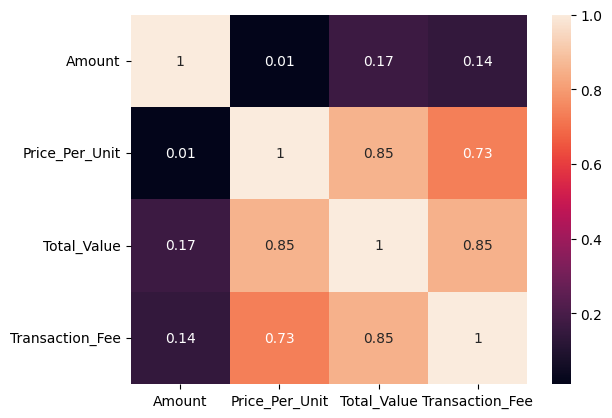

In [8]:
import seaborn as sns 

numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(['Transaction_ID', 'User_ID'], axis=1)
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True)

In [11]:
# Calculate KPIs

# 1. Average Transaction Value (ATV)
atv = df['Total_Value'].mean()
print(f"\nAverage Transaction Value: ${atv:.2f}")

# 2. Fee to Transaction Value Ratio
fee_ratio = (df['Transaction_Fee'].sum() / df['Total_Value'].sum()) * 100
print(f"Fee to Transaction Value Ratio: {fee_ratio:.2f}%")

# 3. User Activity
transactions_per_user = df.groupby('User_ID').size().mean()
print(f"Average Transactions per User: {transactions_per_user:.2f}")

# 4. Platform Distribution
platform_share = df['Platform'].value_counts(normalize=True) * 100
print("\nPlatform Market Share:")
print(platform_share)

# 5. Crypto Type Distribution
crypto_share = df['Crypto'].value_counts(normalize=True) * 100
print("\nCrypto Type Distribution:")
print(crypto_share)

# 6. Success Rate
success_rate = len(df[df['Status'] == 'Completed']) / len(df) * 100
print(f"\nTransaction Success Rate: {success_rate:.2f}%")

# 7. Wallet Type Usage
wallet_usage = df['Wallet_Type'].value_counts(normalize=True) * 100
print("\nWallet Type Usage:")
print(wallet_usage)

# 8. Daily Active Users (DAU)
dau = df.groupby('Day')['User_ID'].nunique()
avg_dau = dau.mean()
print(f"\nAverage Daily Active Users: {avg_dau:.2f}")

# 9. Monthly Growth Rate
monthly_transactions = df.groupby('Month')['Transaction_ID'].count()
monthly_growth = monthly_transactions.pct_change() * 100
print("\nMonthly Transaction Growth Rate:")
print(monthly_growth)

#9.1 Quarter Growth Rate
quarterly_transactions = df.groupby('Quarter')['Transaction_ID'].count()
quarterly_growth = quarterly_transactions.pct_change() * 100
print("\nQuarterly Transaction Growth Rate:")
print(quarterly_growth)


# 10. Average Fee per Transaction
avg_fee = df['Transaction_Fee'].mean()
print(f"\nAverage Fee per Transaction: ${avg_fee:.2f}")


Average Transaction Value: $290877.00
Fee to Transaction Value Ratio: 2.49%
Average Transactions per User: 1.06

Platform Market Share:
Platform
Coinbase    15.15
KuCoin      14.84
Huobi       14.25
Kraken      14.19
FTX         14.04
Binance     13.95
OKX         13.58
Name: proportion, dtype: float64

Crypto Type Distribution:
Crypto
Polkadot     10.77
Ethereum     10.42
Avalanche    10.09
Solana       10.00
Cardano       9.97
Dogecoin      9.97
Bitcoin       9.91
BNB           9.73
XRP           9.64
Litecoin      9.50
Name: proportion, dtype: float64

Transaction Success Rate: 33.22%

Wallet Type Usage:
Wallet_Type
Hot Wallet         20.64
Exchange Wallet    20.18
Ledger             19.83
Trezor             19.71
Cold Wallet        19.64
Name: proportion, dtype: float64

Average Daily Active Users: 13.68

Monthly Transaction Growth Rate:
Month
2023-02            NaN
2023-03    3558.333333
2023-04     -11.617312
2023-05      13.917526
2023-06      -7.239819
2023-07      -8.292683
2